In [1]:
import thunder as td
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
%matplotlib inline
from regression import LinearRegression
import tifffile

In [2]:
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
# conf = (SparkConf()
#          .setMaster("local")
#          .setAppName("My app")
#          .set("spark.executor.memory", "40g")
#          .set("spark.ui.port","8080")
#          .set("spark.driver.host","127.0.0.1")
#          .set("spark.local.dir","/mnt/tmp/")
#        )

# sc = SparkContext(conf = conf)
sc = SparkContext()

In [41]:
sc.stop()

In [39]:
data = tifffile.imread('/mnt/downloads/Itia/hs_Fish201710114_utricular.tif')

MemoryError: 

In [40]:
del(filtered)

In [25]:
horizontal10Hz=[1,11,21];
horizontal300Hz=[2,12,22];
horizontal1kHz=[3,13,23];
vertical10Hz=[6,16,26];
vertical300Hz=[7,17,27];
vertical1kHz=[8,18,29];
vestibular1=[4,14,24];
vestibular2=[5,15,25];
vestibular3=[9,19,29];
vestibular4=[10,20,30];
audio=[31,32,33];

Stimuli=np.zeros([11,720])
GCaMP6_short=[0,5.13796058542217,10.3756715204800,12.2425184714093,8.80831829681196,5.46959264663869,3.42533619066766,2.18017250852183,1.32732537295463,0.730210038304555,0.362253250339685]
GCaMP6_short=np.asarray(GCaMP6_short)
for i in range(0,11):
    for j in range(1,4):
        idxStart=20*i;
        Stimuli[i,(idxStart+(j-1)*200):(idxStart+(j-1)*200)+len(GCaMP6_short)]=GCaMP6_short;             

idxStart=20;
for i in range(31,34):
    Stimuli[10,(idxStart+(i-1)*20):(idxStart+(i-1)*20)+len(GCaMP6_short)]=GCaMP6_short;        


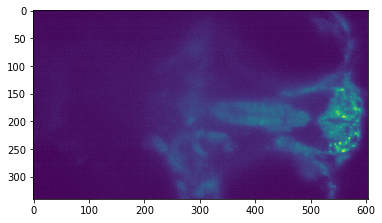

In [30]:
plt.imshow(data[10,0])

In [ ]:
data = td.images.fromarray(data, engine=sc, npartitions=5000)
data = data.repartition(5000)
data

In [32]:
filtered = data.toseries().detrend('linear').normalize()
filtered=filtered.repartition(5000)
filtered.npartitions()

5000

In [3]:
regressor=scipy.io.loadmat('/mnt/downloads/Lena/CA8_reg.mat')
regressor=regressor['CA8_reg']
regressor=regressor

In [91]:
regressor=scipy.io.loadmat('/mnt/downloads/Emmanuel/Loom_regressors2.mat')
regressor=regressor['Regressors']

In [33]:
regressor=Stimuli

In [34]:
del(data)

In [35]:
algorithm = LinearRegression()
model = algorithm.fit(regressor.T,filtered)
r2 = model.score(regressor.T,filtered)

In [36]:
#change the name of files to what you want to save
r2_d=r2.toarray()
betas = model.betas.toarray()
scipy.io.savemat('/mnt/downloads/Itia/hs_Fish201710114_utricular.mat',mdict={'Betas':betas,'rsquared':r2_d})

In [ ]:
#input number of planes
data = tifffile.imread('/mnt/downloads/Lena/HS_CA8_OMR_AUD_5reps_range100_step5_exposure20_power40.0.tif')
data = td.images.fromarray(data, engine=sc, npartitions=5000)
data = data.repartition(5000)
data

In [ ]:
betas.shape

In [4]:
#input number of planes
data = tifffile.imread('/mnt/downloads/Lena/HS_CA8_OMR_AUD_5reps_range100_step5_exposure20_power40.0_1.tif')
data = td.images.fromarray(data, engine=sc, npartitions=5000)
data = data.repartition(5000)
filtered = data.toseries().detrend('linear').normalize()
filtered=filtered.repartition(5000)
algorithm = LinearRegression()
model = algorithm.fit(regressor.T,filtered)
r2 = model.score(regressor.T,filtered)
#change the name of files to what you want to save
r2_d=r2.toarray()
betas = model.betas.toarray()
scipy.io.savemat('/mnt/downloads/Lena/Results_CA8_OMR5rep_fish2.mat',mdict={'Betas':betas,'rsquared':r2_d})

In [6]:
#input number of planes
data = tifffile.imread('/mnt/downloads/Lena/HS_CA8_OMR_AUD_5reps_range100_step5_exposure20_power40.0_2.tif')
data = td.images.fromarray(data, engine=sc, npartitions=5000)
data = data.repartition(5000)
filtered = data.toseries().detrend('linear').normalize()
filtered=filtered.repartition(5000)
algorithm = LinearRegression()
model = algorithm.fit(regressor.T,filtered)
r2 = model.score(regressor.T,filtered)
#change the name of files to what you want to save
r2_d=r2.toarray()
betas = model.betas.toarray()
scipy.io.savemat('/mnt/downloads/Lena/Results_CA8_OMR5rep_fish3.mat',mdict={'Betas':betas,'rsquared':r2_d})

In [7]:
#input number of planes
data = tifffile.imread('/mnt/downloads/Lena/HS_CA8_OMR_AUD_5reps_range100_step5_exposure20_power40.0_3.tif')
data = td.images.fromarray(data, engine=sc, npartitions=5000)
data = data.repartition(5000)
filtered = data.toseries().detrend('linear').normalize()
filtered=filtered.repartition(5000)
algorithm = LinearRegression()
model = algorithm.fit(regressor.T,filtered)
r2 = model.score(regressor.T,filtered)
#change the name of files to what you want to save
r2_d=r2.toarray()
betas = model.betas.toarray()
scipy.io.savemat('/mnt/downloads/Lena/Results_CA8_OMR5rep_fish4.mat',mdict={'Betas':betas,'rsquared':r2_d})

In [42]:
reference = data.mean()
reference=reference.first()
reference.shape

(1, 21, 217, 573)

In [44]:
model = algorithm.fit(data,reference)

In [45]:
Corrected=model.transform(data)
Corrected.npartitions

<bound method Images.npartitions of Images
mode: spark
dtype: uint16
shape: (500, 21, 217, 573)>

In [62]:
filtered = Corrected.toseries().squelch(500).detrend('linear').normalize()
filtered=filtered.repartition(5000)

In [101]:
from factorization import PCA
algorithm = PCA(k=3)
T, W_T = algorithm.fit(filtered)

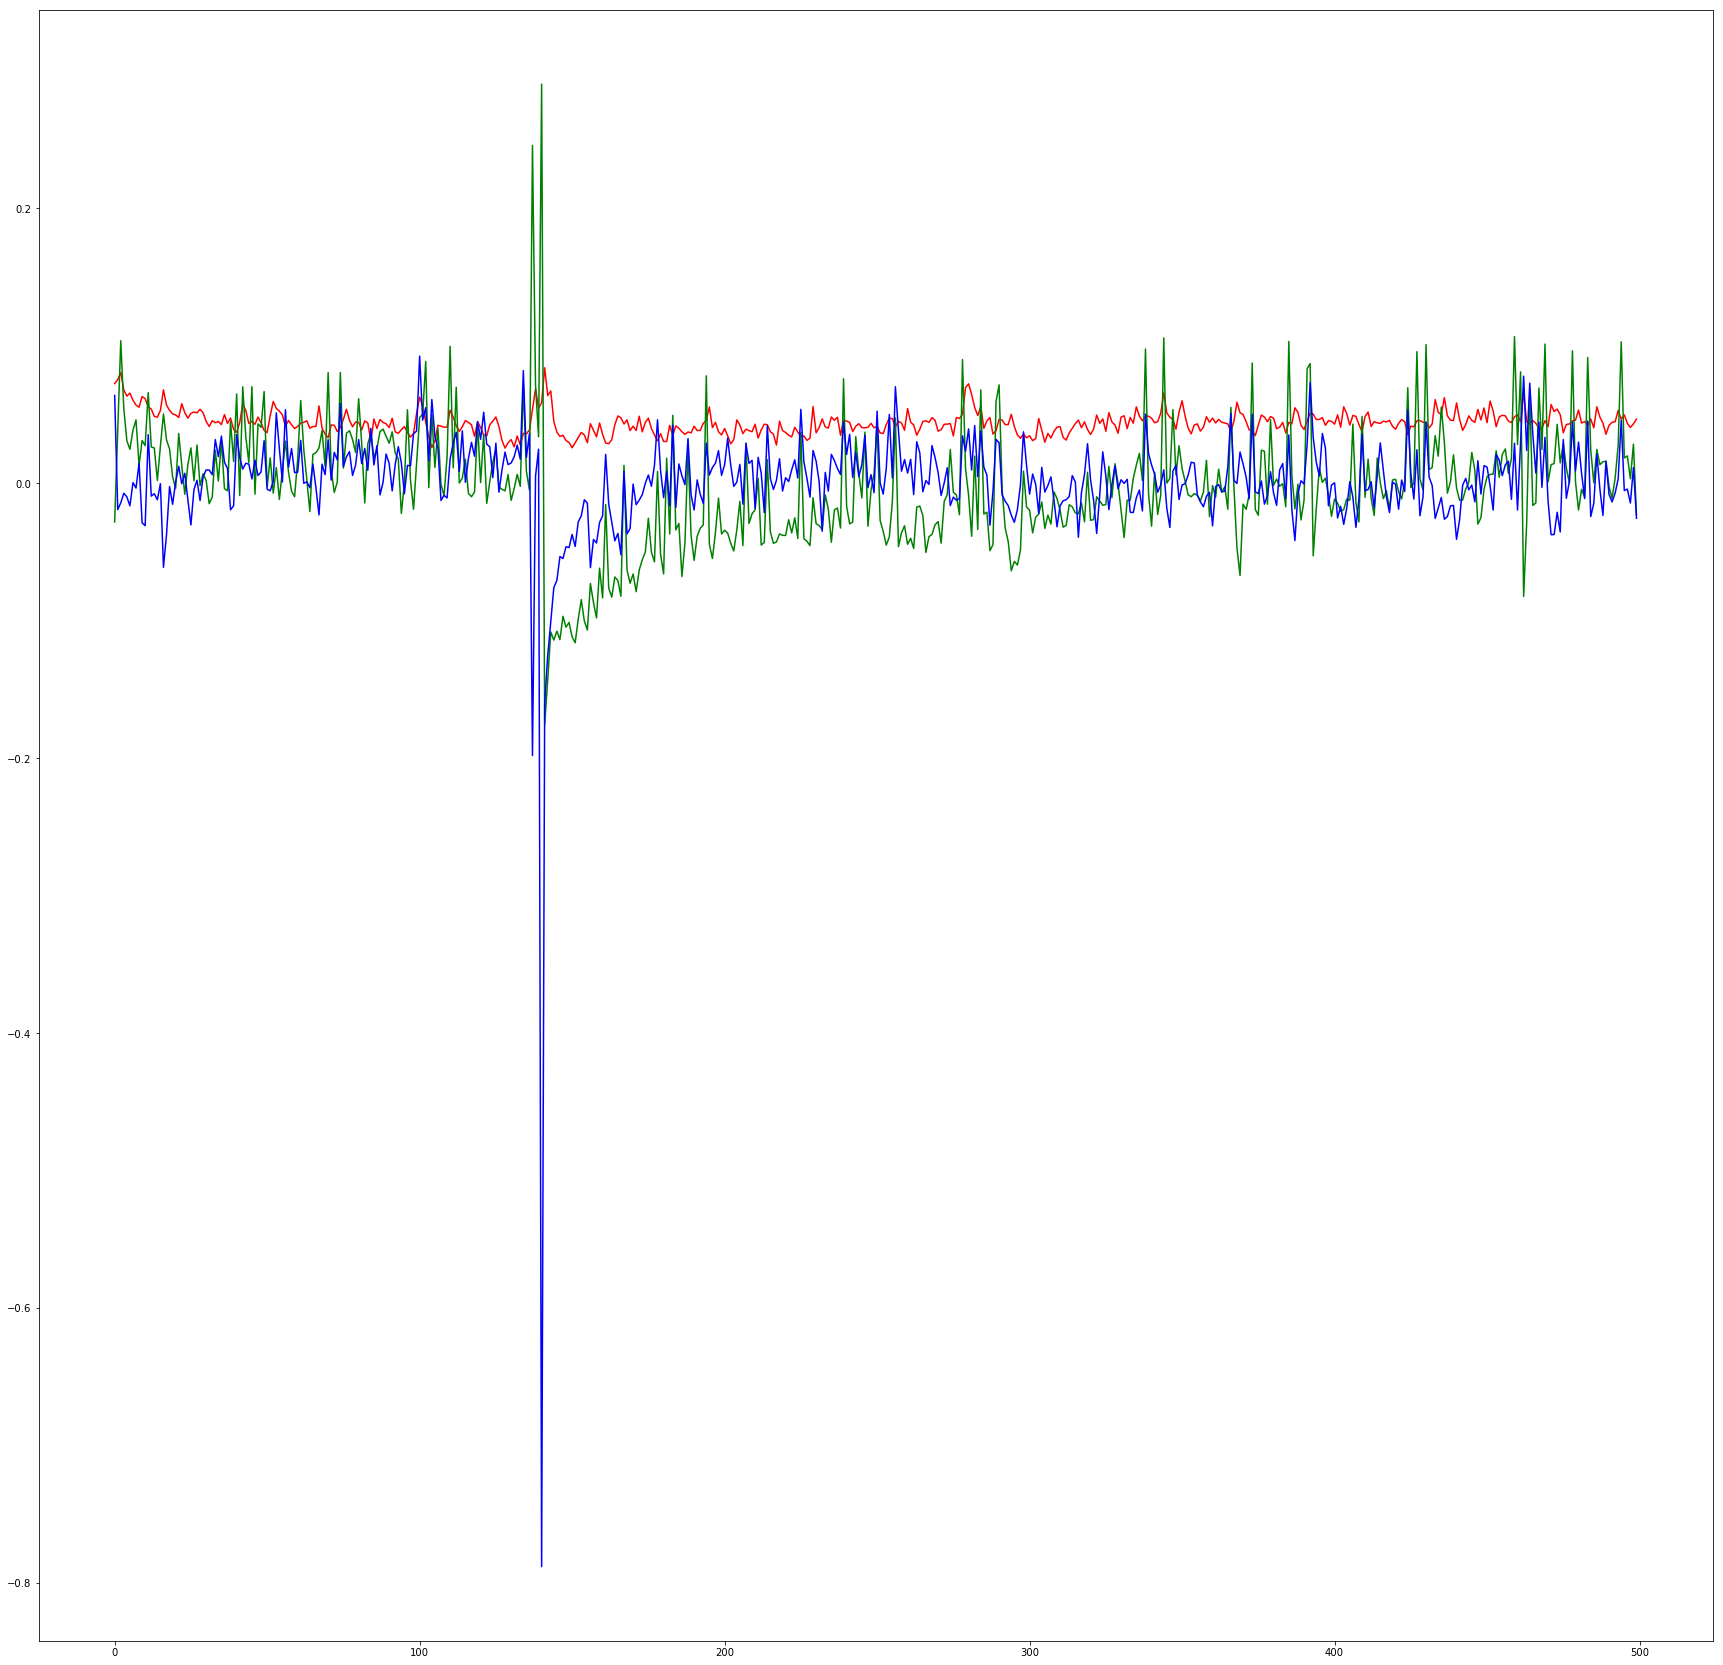

In [102]:
plt.figure(figsize = (30,30))
plt.rcParams['axes.color_cycle'] = ['r', 'g','b']
plt.plot(W_T.T)

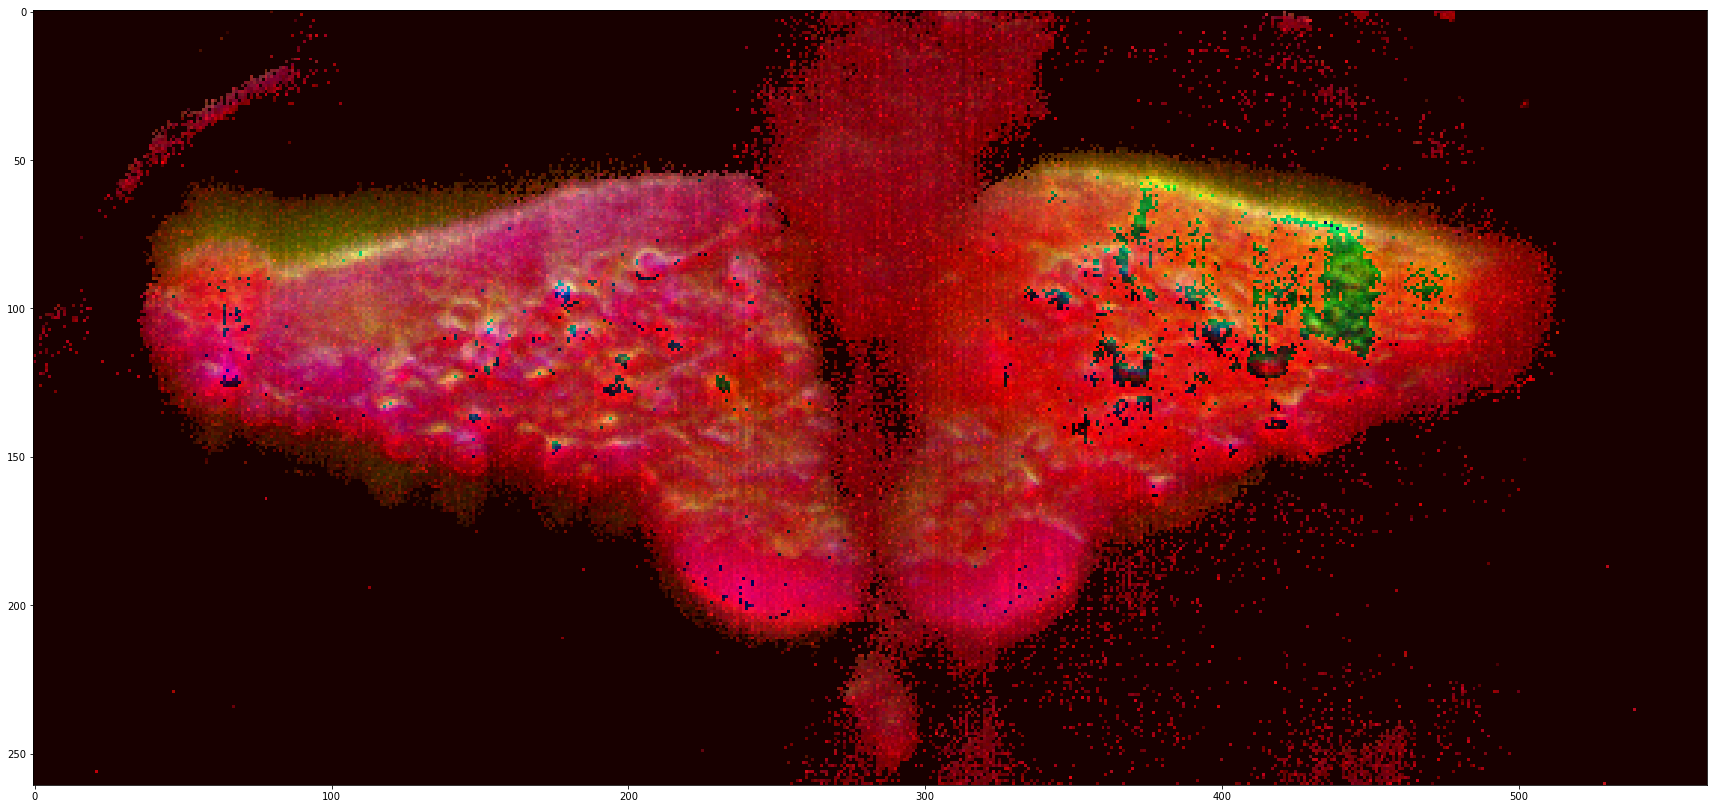

In [103]:
plt.figure(figsize = (30,30))
plt.imshow(abs(np.amax(T[:,:,:,0:3],axis=0)),vmin=0.5)

In [104]:
scipy.io.savemat('/mnt/downloads/Lena/CA8_loom_range100_step5_exposure10_power40.0_1.mat',mdict={'Scores':T,'Coeff':W_T})

In [ ]:
reference = data.mean()
reference.shape

In [38]:
filtered.shape

(49, 340, 604, 720)